In [219]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [201]:
# import dataset with the required columns
cols_to_exp = ['bme680_gas_per_kOhms', 'bme680_humidity', 'bme680_pressure', 'bme680_temperature', 'ccs_TVOC', 'ccs_eCO2', 'nextpm_pm1', 'nextpm_pm10', 'nextpm_pm25']
df = pd.read_csv("docs\datasensors.csv", usecols=cols_to_exp + ['created_at'], parse_dates=['created_at'])
df.head()

,bme680_gas_per_kOhms,bme680_humidity,bme680_pressure,bme680_temperature,ccs_TVOC,ccs_eCO2,created_at,nextpm_pm1,nextpm_pm10,nextpm_pm25
0,15.888,32.39819,1021.47,27.80968,15,505,2022-08-09 12:15:34.676000+00:00,0.7,3.3,1.5
1,18.807,32.88076,1020.19,28.98965,123,1212,2022-08-09 12:20:16.482000+00:00,1.3,6.8,2.5
2,15.070,32.45730,1021.39,28.08968,0,400,2022-08-09 12:46:56.865000+00:00,0.7,2.0,1.6
3,19.013,32.18901,1020.04,29.19965,36,641,2022-08-09 12:50:48.679000+00:00,1.3,3.8,2.4
4,14.635,30.97075,1021.14,28.88968,1,413,2022-08-09 13:18:16.550000+00:00,0.9,3.3,1.8


In [202]:
df.shape

(6033, 10)

In [203]:
df.isna().sum()

bme680_gas_per_kOhms    0
bme680_humidity         0
bme680_pressure         0
bme680_temperature      0
ccs_TVOC                0
ccs_eCO2                0
created_at              0
nextpm_pm1              0
nextpm_pm10             0
nextpm_pm25             0
dtype: int64

In [204]:
df.duplicated().sum()

0

In [205]:
# verify data types
df.dtypes

bme680_gas_per_kOhms                float64
bme680_humidity                     float64
bme680_pressure                     float64
bme680_temperature                  float64
ccs_TVOC                              int64
ccs_eCO2                              int64
created_at              datetime64[ns, UTC]
nextpm_pm1                          float64
nextpm_pm10                         float64
nextpm_pm25                         float64
dtype: object

In [206]:
# check the standard deviation of difference between each time interval
(df["created_at"] - df["created_at"].shift(1)).std()

Timedelta('0 days 00:09:08.384876372')

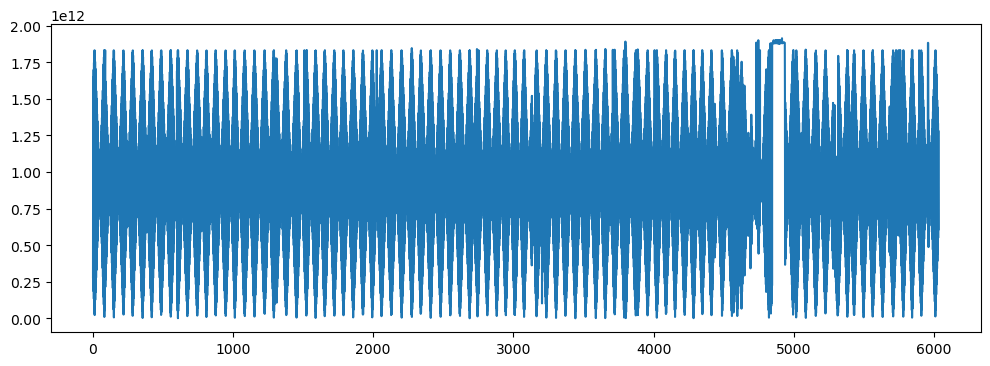

In [207]:
# variation in time difference
(df["created_at"] - df["created_at"].shift(1)).plot(figsize=(12,4));

We see that our data was extracted over uneven interval periods of time.

In [208]:
max(df["created_at"]) - min(df['created_at'])

Timedelta('66 days 01:20:48.343000')

We see our data range is between 66 days.

In [209]:
# set the time series column as index for further analysis
df = df.set_index("created_at").sort_index()
df.head()

,bme680_gas_per_kOhms,bme680_humidity,bme680_pressure,bme680_temperature,ccs_TVOC,ccs_eCO2,nextpm_pm1,nextpm_pm10,nextpm_pm25
created_at,,,,,,,,,
2022-08-09 12:15:34.676000+00:00,15.888,32.39819,1021.47,27.80968,15,505,0.7,3.3,1.5
2022-08-09 12:20:16.482000+00:00,18.807,32.88076,1020.19,28.98965,123,1212,1.3,6.8,2.5
2022-08-09 12:46:56.865000+00:00,15.070,32.45730,1021.39,28.08968,0,400,0.7,2.0,1.6
2022-08-09 12:50:48.679000+00:00,19.013,32.18901,1020.04,29.19965,36,641,1.3,3.8,2.4
2022-08-09 13:18:16.550000+00:00,14.635,30.97075,1021.14,28.88968,1,413,0.9,3.3,1.8


We resample our data by every hour as we can average out the data for all observations in hourly format.

In [210]:
df = df.resample("H").mean()
df.head()

,bme680_gas_per_kOhms,bme680_humidity,bme680_pressure,bme680_temperature,ccs_TVOC,ccs_eCO2,nextpm_pm1,nextpm_pm10,nextpm_pm25
created_at,,,,,,,,,
2022-08-09 12:00:00+00:00,17.19450,32.481315,1020.7725,28.522165,43.50,689.50,1.000,3.975,2.000
2022-08-09 13:00:00+00:00,17.05625,31.082705,1020.4200,29.114665,248.00,934.50,1.275,4.775,2.400
2022-08-09 14:00:00+00:00,17.24275,30.002917,1019.8925,29.424665,2.25,217.25,1.150,3.875,2.225
2022-08-09 15:00:00+00:00,17.50500,29.382020,1019.4075,29.524667,1.00,206.75,1.050,4.250,1.725
2022-08-09 16:00:00+00:00,17.81375,28.850455,1018.8475,29.497165,5.50,237.50,0.950,2.950,1.650


In [211]:
df.shape

(1586, 9)

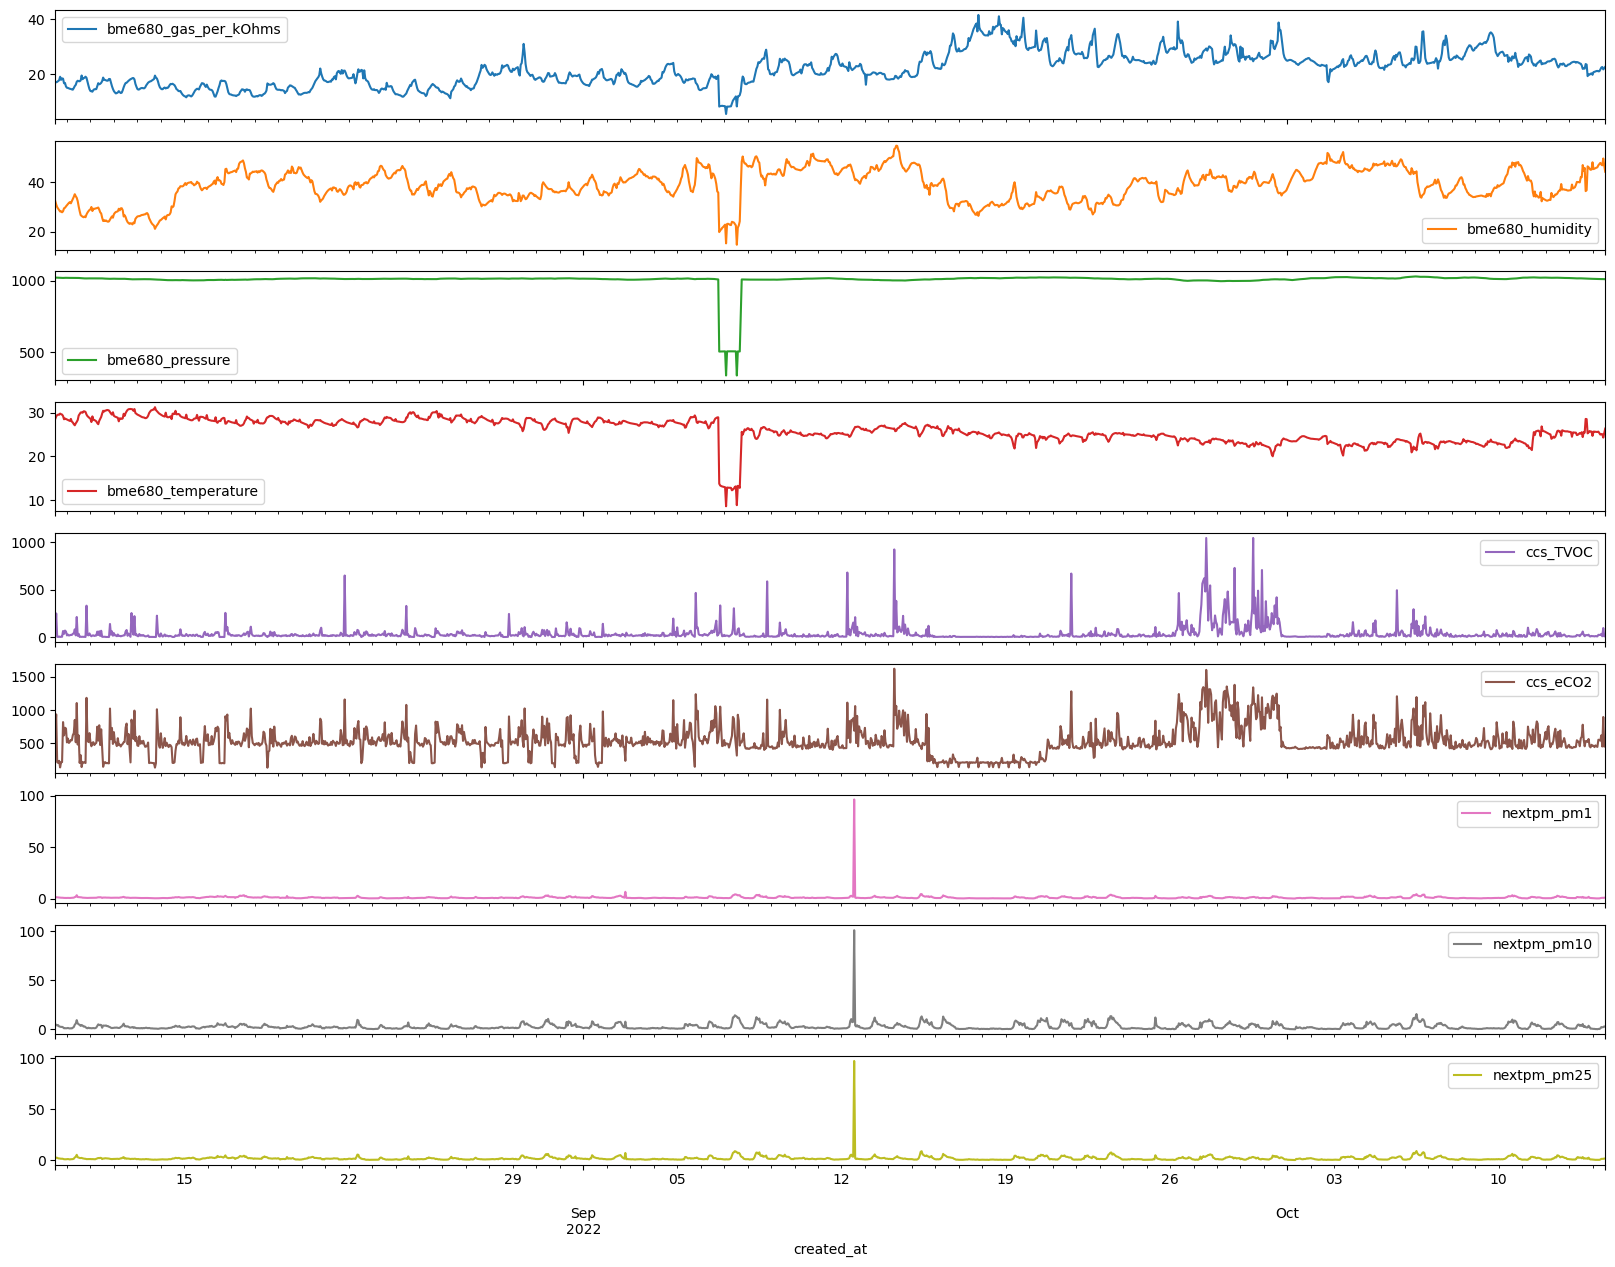

In [212]:
# plot the time series for all features
df.plot(subplots=True, figsize=(20,15));

##### Functions to perform Random Forest Regression on time series.

In [213]:
# a function that converts the time series data in supervised modelling array format
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [214]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

In [215]:
# fit a random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = np.asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

In [220]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    ma_error = mean_absolute_error(test[:, -1], predictions)
    rms_error = np.sqrt(mean_squared_error(test[:, -1], predictions))
    map_error = mean_absolute_percentage_error(test[:, -1], predictions)
    return ma_error, rms_error, map_error, test[:, -1], predictions

Fitting model with Feature: bme680_gas_per_kOhms

>expected=20.9, predicted=20.7
>expected=21.0, predicted=21.5
>expected=21.2, predicted=21.2
>expected=21.2, predicted=21.6
>expected=21.1, predicted=21.2
>expected=21.1, predicted=20.7
>expected=21.7, predicted=20.9
>expected=22.4, predicted=21.3
>expected=22.6, predicted=22.6
>expected=21.8, predicted=22.5
>expected=22.2, predicted=22.3
>expected=22.7, predicted=22.2
MAE: 0.422


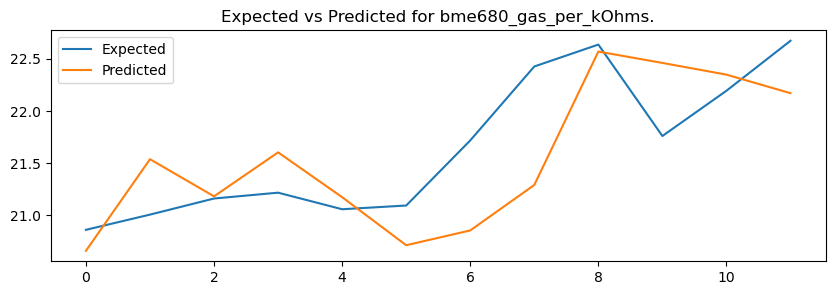

####################################

Fitting model with Feature: bme680_humidity

>expected=45.6, predicted=44.9
>expected=45.8, predicted=45.0
>expected=45.9, predicted=45.9
>expected=46.1, predicted=46.4
>expected=46.9, predicted=46.2
>expected=47.4, predicted=46.7
>expected=47.9, predicted=47.5
>expected=47.2, predicted=47.8
>expected=46.9, predicted=47.0
>expected=49.7, predicted=46.8
>expected=46.8, predicted=50.0
>expected=44.3, predicted=46.9
MAE: 1.065


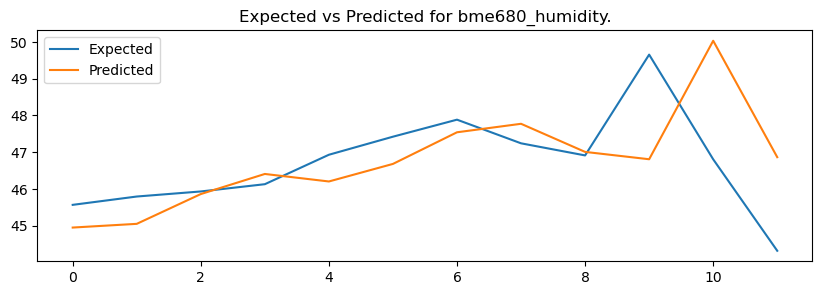

####################################

Fitting model with Feature: bme680_pressure

>expected=1011.4, predicted=1011.5
>expected=1010.8, predicted=1011.1
>expected=1010.3, predicted=1010.5
>expected=1010.1, predicted=1010.1
>expected=1010.0, predicted=1010.1
>expected=1009.7, predicted=1010.0
>expected=1009.8, predicted=1004.5
>expected=1010.3, predicted=1010.0
>expected=1010.6, predicted=1010.5
>expected=1010.2, predicted=1010.9
>expected=1010.1, predicted=1010.3
>expected=1009.6, predicted=1010.2
MAE: 0.676


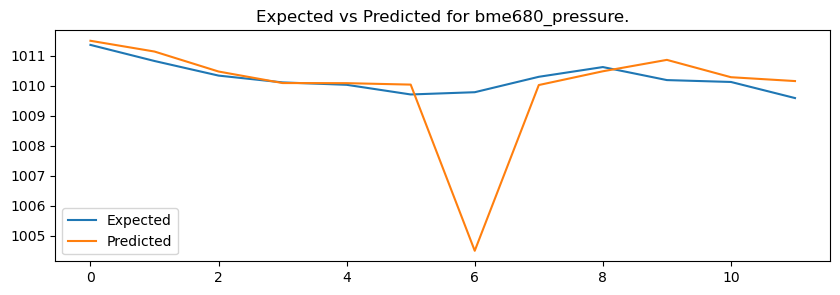

####################################

Fitting model with Feature: bme680_temperature

>expected=25.6, predicted=25.6
>expected=25.6, predicted=25.7
>expected=25.6, predicted=25.7
>expected=25.6, predicted=25.4
>expected=25.6, predicted=25.4
>expected=25.3, predicted=25.6
>expected=25.0, predicted=25.2
>expected=25.1, predicted=25.1
>expected=25.1, predicted=25.0
>expected=24.3, predicted=25.1
>expected=25.3, predicted=24.5
>expected=26.3, predicted=25.2
MAE: 0.325


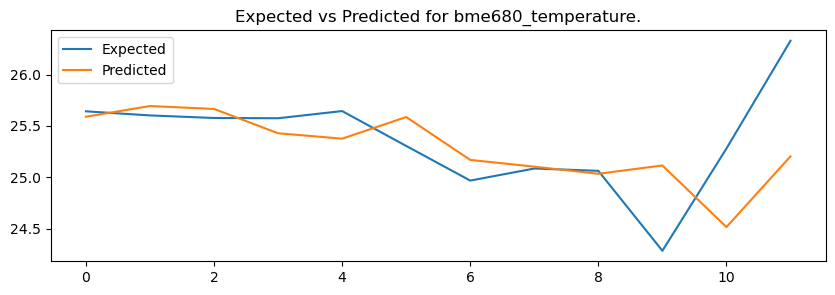

####################################

Fitting model with Feature: ccs_TVOC

>expected=6.2, predicted=14.7
>expected=10.0, predicted=29.1
>expected=7.8, predicted=18.8
>expected=6.8, predicted=15.0
>expected=23.0, predicted=20.8
>expected=22.2, predicted=19.9
>expected=21.2, predicted=19.0
>expected=33.0, predicted=18.9
>expected=7.8, predicted=31.5
>expected=94.3, predicted=29.2
>expected=7.2, predicted=41.8
>expected=8.3, predicted=61.9
MAE: 20.383


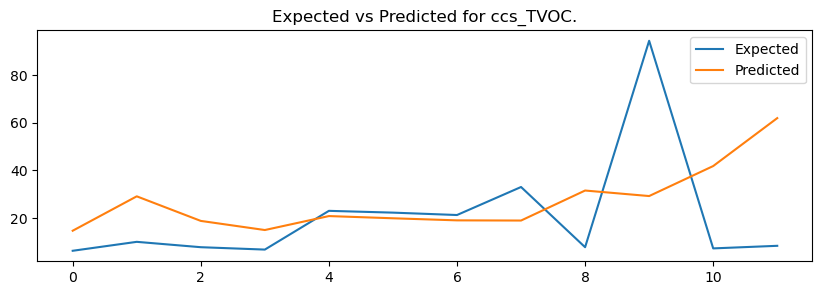

####################################

Fitting model with Feature: ccs_eCO2

>expected=443.8, predicted=476.5
>expected=469.8, predicted=461.8
>expected=455.0, predicted=482.7
>expected=446.8, predicted=495.9
>expected=554.5, predicted=459.0
>expected=550.2, predicted=527.7
>expected=541.8, predicted=546.1
>expected=619.8, predicted=540.2
>expected=452.5, predicted=604.4
>expected=896.0, predicted=600.7
>expected=451.0, predicted=666.6
>expected=458.7, predicted=668.8
MAE: 99.380


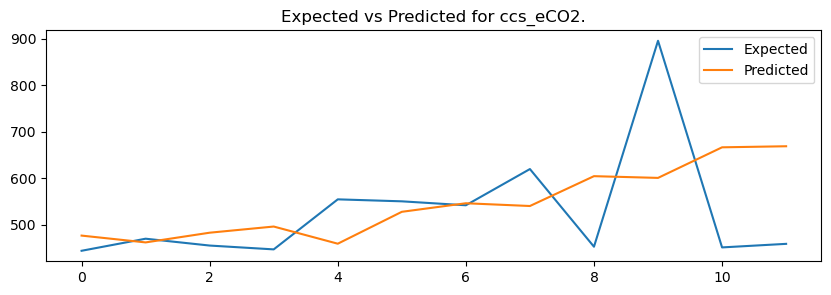

####################################

Fitting model with Feature: nextpm_pm1

>expected=0.2, predicted=0.3
>expected=0.1, predicted=0.3
>expected=0.1, predicted=0.1
>expected=0.1, predicted=0.1
>expected=0.1, predicted=0.1
>expected=0.1, predicted=0.2
>expected=0.3, predicted=0.2
>expected=0.6, predicted=0.6
>expected=0.7, predicted=0.8
>expected=0.6, predicted=0.9
>expected=0.8, predicted=0.8
>expected=0.8, predicted=0.9
MAE: 0.101


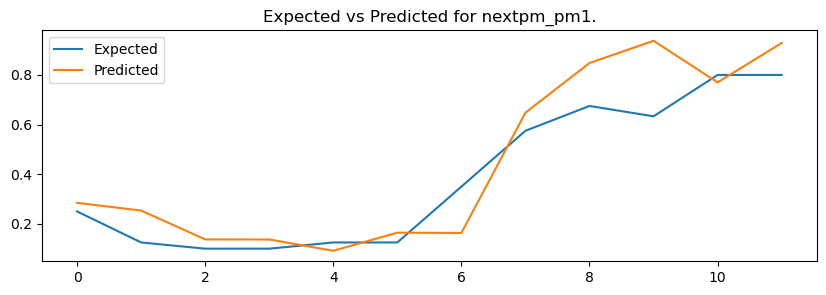

####################################

Fitting model with Feature: nextpm_pm10

>expected=0.5, predicted=0.5
>expected=0.2, predicted=0.5
>expected=0.3, predicted=0.3
>expected=0.1, predicted=0.5
>expected=0.4, predicted=0.3
>expected=0.3, predicted=0.4
>expected=0.9, predicted=0.9
>expected=2.3, predicted=1.5
>expected=2.0, predicted=4.3
>expected=2.2, predicted=5.2
>expected=3.0, predicted=3.9
>expected=2.8, predicted=3.0
MAE: 0.691


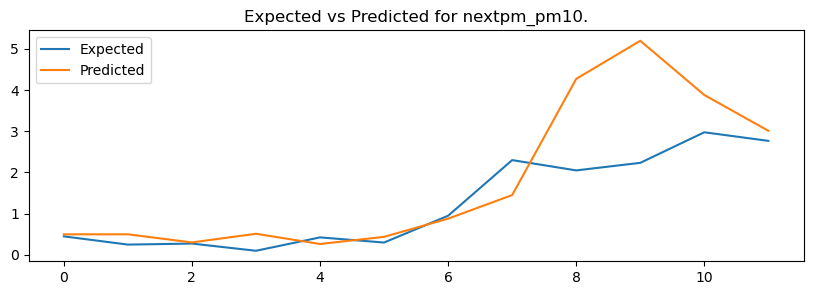

####################################

Fitting model with Feature: nextpm_pm25

>expected=0.4, predicted=0.5
>expected=0.2, predicted=0.4
>expected=0.2, predicted=0.3
>expected=0.1, predicted=0.4
>expected=0.2, predicted=0.2
>expected=0.2, predicted=0.3
>expected=0.6, predicted=0.4
>expected=1.2, predicted=1.0
>expected=1.2, predicted=1.8
>expected=1.2, predicted=1.8
>expected=1.5, predicted=1.6
>expected=1.4, predicted=1.5
MAE: 0.211


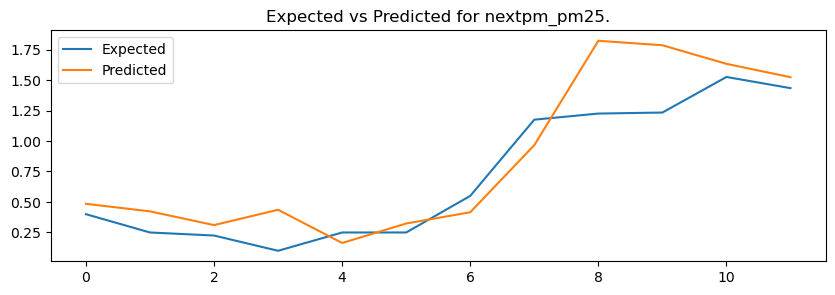

####################################



In [222]:
eval_df = pd.DataFrame(columns=["Features", "MAE", "RMSE", "MAPE"])
idxxx = 0
for col in cols_to_exp:

    print(f"Fitting model with Feature: {col}\n")
    
    t_data = list(df[col].values)
    data = series_to_supervised(t_data, n_in=6) # sliding window of 6 input time steps
    mae, rmse, map_error, y, yhat = walk_forward_validation(data, 12) # evaluate predictions for 12 iterations from previous 6 time steps
    eval_df.loc[idxxx] = [col, np.round(mae, 2), np.round(rmse, 2), np.round(map_error, 2)]
    idxxx += 1
    print('MAE: %.3f' % mae)
    
    # plot expected vs predicted
    plt.figure(figsize=(10,3))
    plt.title(f"Expected vs Predicted for {col}.")
    plt.plot(y, label='Expected')
    plt.plot(yhat, label='Predicted')
    plt.legend()
    plt.show()

    print("####################################\n")

In [223]:
# summarize model performance across all features
eval_df

,Features,MAE,RMSE,MAPE
0,bme680_gas_per_kOhms,0.42,0.54,0.02
1,bme680_humidity,1.06,1.51,0.02
2,bme680_pressure,0.68,1.56,0.00
3,bme680_temperature,0.33,0.48,0.01
4,ccs_TVOC,20.38,28.44,1.80
5,ccs_eCO2,99.38,135.78,0.18
6,nextpm_pm1,0.10,0.13,0.34
7,nextpm_pm10,0.69,1.14,0.78
8,nextpm_pm25,0.21,0.28,0.56
